# **1. Data Loading and Exploration**

In [2]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import string
import math
import time

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, validation_curve, learning_curve
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn import metrics


# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Set up visualization
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('tagsets_json')  # Tagset resource
nltk.download('punkt_tab') # Tokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
from google.colab import files
train = files.upload()
test = files.upload()

In [4]:
import pandas as pd
df_train = pd.read_excel('AI_vs_huam_train_dataset.xlsx')
df_test = pd.read_csv('Final_test_data.csv')

In [5]:
df_train.head()

,essay,label
0,International sports events require the most w...,0
1,Globalisation has become a significant aspect ...,0
2,There is an ever-increasing number of bullying...,0
3,"It is commonly believed, that companies should...",0
4,Despite knowing about the adverse effects of c...,0


In [6]:
df_train.describe()

,label
count,3728.000000
mean,0.500000
std,0.500067
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [7]:
df_train.groupby('label').describe()

essay                                                               
      count unique                                                top freq
label                                                                     
0      1864   1864  Eessential way to succeed is trying new things...    1
1      1864   1864  The key to success is trying new things while ...    1

# **2. Preprocessing Functions**

Start by removing accents, punctuation, and stopwords and making everything lowercase to reduce the total amount of unqiue words for training.

In [8]:
import string
from nltk.corpus import stopwords
import unicodedata

def text_process(essay):
    """
    Cleans and processes a string.

    This function takes a raw string and performs several text cleaning steps:
    1. Checks if the input is a string; returns an empty string otherwise.
    2. Defines a list of common English stopwords.
    3. Removes all punctuation from the string.
    4. Removes the defined stopwords from the string.
    5. Joins the remaining words back into a single cleaned string.

    Args:
        essay (str): The input essay string to be processed.

    Returns:
        str: The cleaned essay string with punctuation and stopwords removed,
             or an empty string if the input was not a string.
    """

    # Normalize the string to its decomposed form (NFD)
    normalized = unicodedata.normalize('NFD', essay)
    # Filter out the combining characters (diacritics)
    essay = ''.join(char for char in normalized if unicodedata.category(char) != 'Mn')

    # Handle non-string values gracefully
    if not isinstance(essay, str):
        return ""

    # Define a set of standard English stopwords
    STOPWORDS = set(stopwords.words('english'))

    # Remove punctuation from the tweet
    nopunc = ''.join([char for char in essay if char not in string.punctuation])

    # Remove stopwords and join the words back into a string
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in STOPWORDS])

In [9]:
# Show vocab before stopword removal
train_vocab_bf = set(" ".join(df_train['essay']).split())
test_vocab_bf = set(" ".join(df_test['essay']).split())

print("=== Vocabulary statistics before stopword removal ===")
print(f"Train unique words : {len(train_vocab_bf):,}")
print(f"Test  unique words : {len(test_vocab_bf):,}")

=== Vocabulary statistics before stopword removal ===
Train unique words : 42,702
Test  unique words : 16,261


In [10]:
df_train['essay']

,essay
0,International sports events require the most w...
1,Globalisation has become a significant aspect ...
2,There is an ever-increasing number of bullying...
3,"It is commonly believed, that companies should..."
4,Despite knowing about the adverse effects of c...
...,...
3723,I agree that successful people are willing to ...
3724,I believe that people who are open to trying n...
3725,"To succeed in life, we must do everything poss..."
3726,"I'm not entirely sure what the word ""successfu..."


In [11]:
# Apply text cleaning to the "essay" column
df_train['clean_essay'] = df_train['essay'].apply(text_process)
df_test['clean_essay'] = df_test['essay'].apply(text_process)

# Show vocab after stopword removal
train_vocab = set(" ".join(df_train['clean_essay']).split())
test_vocab = set(" ".join(df_test['clean_essay']).split())

print("=== Vocabulary statistics after stopword removal ===")
print(f"Train unique words : {len(train_vocab):,}")
print(f"Test  unique words : {len(test_vocab):,}")

=== Vocabulary statistics after stopword removal ===
Train unique words : 26,511
Test  unique words : 10,814


In [12]:
df_train['clean_essay']

,clean_essay
0,international sports events require welltraine...
1,globalisation become significant aspect world’...
2,everincreasing number bullying activities nume...
3,commonly believed companies dress code policy ...
4,despite knowing adverse effects climate change...
...,...
3723,agree successful people willing try new things...
3724,believe people open trying new things willing ...
3725,succeed life must everything possible‚aiand so...
3726,im entirely sure word successful really means ...


In [13]:
# Quick peek at words
print("Sample train words :", sorted(list(train_vocab))[:1000], "...\n")
print("Sample test  words :", sorted(list(test_vocab))[:1000], "...\n")

Sample train words : ['000', '002', '1', '10', '100', '1000', '10000', '100inch', '100meter', '100mts', '100th', '10year', '11', '12', '1200', '120000', '12yearold', '13', '1492', '14th', '14thcentury', '15', '150', '1500', '15th', '15whileother', '16', '160', '16m', '17', '170', '1789', '18', '1800s', '18th', '18thcentury', '19', '1900s', '1903', '1919', '1920s', '1923', '1923in', '1928', '1930s', '1941', '19411942', '1950s', '1960s', '1963', '1970s', '1980', '1980s', '1984', '1988', '1990', '1990s', '1991', '1994', '1995', '1998', '19th', '1hrthis', '1paragraph', '1st', '1v1', '1‚aibut', '2', '20', '200', '2000', '20000', '2000s', '2001', '2003', '2005', '2006', '2008', '2009', '200in', '200meter', '200mts', '2013', '2014', '2016', '2017', '2018', '2020', '2021', '2022', '2050', '20s', '20th', '20years', '21', '21st', '22', '228', '23', '2426c', '2426¬∞c', '247', '25', '250', '26', '27', '29', '2hour', '2nd', '3', '30', '300', '30000', '30000ayear', '30s', '30year', '34', '35', '3500

Use regular expressions to remove digits

In [14]:
def remove_digits(data):
  # Exclude any digits
  vectorizer_exclude_any_digits = CountVectorizer(binary=True, token_pattern=r'(?u)\b(?!.*\d)\w+\b')
  vocab_exclude_any_digits = vectorizer_exclude_any_digits.fit(data).vocabulary_.keys()

  return ' '.join(vocab_exclude_any_digits)

In [15]:
# Apply digit removal to "clean_essay" column
df_train['clean_essay'] = remove_digits(df_train['clean_essay'])
df_test['clean_essay'] = remove_digits(df_test['clean_essay'])

# Show vocab after stopword removal
train_vocab_nodig = set(" ".join(df_train['clean_essay']).split())
test_vocab_nodig = set(" ".join(df_test['clean_essay']).split())

print("=== Vocabulary statistics after stopword removal ===")
print(f"Train unique words : {len(train_vocab_nodig):,}")
print(f"Test  unique words : {len(test_vocab_nodig):,}")

=== Vocabulary statistics after stopword removal ===
Train unique words : 23,145
Test  unique words : 10,187


In [16]:
# Quick peek at words
print("Sample train words :", sorted(list(train_vocab_nodig))[:1000], "...\n")
print("Sample test  words :", sorted(list(test_vocab_nodig))[:1000], "...\n")

Sample train words : ['a', 'aa', 'aaaas', 'aaaea', 'aaaπaa', 'aaiaa', 'aalready', 'abandon', 'abandond', 'abandoned', 'abandoning', 'abandonned', 'abati', 'abbbandon', 'abbility', 'abbreviated', 'abbreviations', 'abd', 'abdicate', 'abdul', 'abdulazez', 'abdulaziz', 'abetter', 'abide', 'abilit', 'abilites', 'abilitie', 'abilities', 'abilitity', 'abilitiy', 'ability', 'abilityfinally', 'abilityit', 'abilitymotivation', 'abilityso', 'abillities', 'abilties', 'abiltities', 'abilty', 'abituee', 'able', 'ablities', 'ablr', 'abn', 'abnormal', 'aboard', 'abolish', 'abolished', 'abolishing', 'abolishment', 'abolition', 'abondoned', 'aboout', 'abortion', 'abortions', 'abot', 'abou', 'about', 'aboutgrowth', 'abouthowever', 'aboutones', 'abouttaking', 'abovei', 'abovementioned', 'abovereviewed', 'abraham', 'abreast', 'abroad', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolutelyin', 'absolutes', 'absolutly', 'absorb', 'absorbed', 'absorbing', 'absorptive', 'absract', 'abstaining'

Now apply lemmatization

In [17]:
def lemmatize_words(essay):
  # Tokenize essay
  tokens = nltk.word_tokenize(essay)

  # Intialize the WordNet Lemmatizer
  lemmatizer = WordNetLemmatizer()

  # Apply lemmatization on the tokens
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return ' '.join(lemmatized_tokens)

In [18]:
# Test on one essay
essay = df_train['clean_essay'][0]
print("Original Essay:", essay)

# Apply lemmatization
lemmatized_essay = lemmatize_words(essay)
print("Lemmatized Essay:", lemmatized_essay)

Original Essay: international sports events require welltrained athletes country order achieve goal countries make effort build infrastructure designed train top although policy indeed fewer facilities ordinary people investing best vital develop competitive performances one hand building specific crucial get better results olympics world cup importance getting creates awareness society motivates sport way developments help integral benefit everyone argue negative effect could less built rest however practice daily life necessarily need example often use public spaces running yoga nearest park home alternatives facility case training sum strongly believe invest specialised long term going generate motivation schools therefore globalisation become significant aspect s modern economy countless industries businesses expanding various led debate developing currency many believing drastically economies assist development countriesa worldwide bring effects similar euro developed europe trade

In [19]:
# Apply lemmatization to database
df_train['clean_essay'] = df_train['clean_essay'].apply(lemmatize_words)
df_test['clean_essay'] = df_test['clean_essay'].apply(lemmatize_words)

# Show vocab after lemmatization
train_vocab_lemmatized = set(" ".join(df_train['clean_essay']).split())
test_vocab_lemmatized = set(" ".join(df_test['clean_essay']).split())

print("=== Vocabulary statistics after lemmatization ===")
print(f"Train unique words : {len(train_vocab_lemmatized):,}")
print(f"Test  unique words : {len(test_vocab_lemmatized):,}")

=== Vocabulary statistics after lemmatization ===
Train unique words : 21,074
Test  unique words : 9,242


In [20]:
# Quick peek at words
print("Sample train words :", sorted(list(train_vocab_lemmatized))[:1000], "...\n")
print("Sample test  words :", sorted(list(test_vocab_lemmatized))[:1000], "...\n")

Sample train words : ['a', 'aa', 'aaaas', 'aaaea', 'aaaπaa', 'aaiaa', 'aalready', 'abandon', 'abandond', 'abandoned', 'abandoning', 'abandonned', 'abati', 'abbbandon', 'abbility', 'abbreviated', 'abbreviation', 'abd', 'abdicate', 'abdul', 'abdulazez', 'abdulaziz', 'abetter', 'abide', 'abilit', 'abilites', 'abilitie', 'abilitity', 'abilitiy', 'ability', 'abilityfinally', 'abilityit', 'abilitymotivation', 'abilityso', 'abillities', 'abilties', 'abiltities', 'abilty', 'abituee', 'able', 'ablities', 'ablr', 'abn', 'abnormal', 'aboard', 'abolish', 'abolished', 'abolishing', 'abolishment', 'abolition', 'abondoned', 'aboout', 'abortion', 'abot', 'abou', 'about', 'aboutgrowth', 'abouthowever', 'aboutones', 'abouttaking', 'abovei', 'abovementioned', 'abovereviewed', 'abraham', 'abreast', 'abroad', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolutelyin', 'absolutly', 'absorb', 'absorbed', 'absorbing', 'absorptive', 'absract', 'abstaining', 'abstract', 'abstracthowever', 'absurd

# **3. Pipeline Creation**

In [21]:
# Use training data
X = df_train['clean_essay']  # Already preprocessed text
y = df_train['label']  # Binary labels (0=human, 1=AI)

print(f"Training dataset shape: X={len(X)}, y={len(y)}")
print(f"Sentiment distribution: {np.bincount(y)}")

# Create train/validation split from your training data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Downsize further for SVM
X_train_svm = X_train[:1500]
y_train_svm = y_train[:1500]

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Training samples for SVM: {len(X_train_svm)}")

Training dataset shape: X=3728, y=3728
Sentiment distribution: [1864 1864]
Training samples: 2982
Validation samples: 746
Training samples for SVM: 1500


In [22]:
# Basic SVM Pipeline
from sklearn import svm

# Create basic SVM pipeline
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', svm.SVC(max_iter=1000, probability=True, random_state=42, cache_size=1000)) # higher cache size to reduce training time
])

In [23]:
# Basic Decision Tree Pipeline
from sklearn import tree

# Create basic Decision Tree pipeline
dt_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1000, ngram_range=(1,2))),
    ('classifier', tree.DecisionTreeClassifier(random_state=42))
])

# **4. Hyperparameter Optimization**

Implementing GridSearchCV:

In [24]:
print("\n Hyperparameter Tuning For SVM ")
print("-" * 45)

# Define SVM param grid, decreasing parameter amount due to intensive nature of SVM
svm_param_grid = {
'vectorizer__max_features': [1000, 5000],
'vectorizer__ngram_range': [(1,1), (1,2)],
'classifier__C': [0.1, 1],
'classifier__kernel': ['linear', 'rbf']
}

# Perform Grid Search
svm_grid_search = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print(f"\nPerforming Grid Search for SVM Model...")
start_time = time.time()
svm_grid_search.fit(X_train_svm, y_train_svm)
grid_time = time.time() - start_time

print(f"Grid Search completed in {grid_time:.2f} seconds")
print(f"Best parameters: {svm_grid_search.best_params_}")
print(f"Best CV score: {svm_grid_search.best_score_:.4f}")

# Evaluate SVM model on validation set
svm_val_score = svm_grid_search.score(X_val, y_val)
print(f"SVM validation accuracy: {svm_val_score:.4f}")


 Hyperparameter Tuning For SVM 
---------------------------------------------

Performing Grid Search for SVM Model...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Grid Search completed in 3543.02 seconds
Best parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 1)}
Best CV score: 0.5100
SVM validation accuracy: 0.5000


In [25]:
print("\n Hyperparameter Tuning For Decision Tree ")
print("-" * 45)

dt_param_grid = {
'classifier__criterion': ['gini', 'entropy'],
'classifier__max_depth': [10, 20],
'classifier__min_samples_split': [2, 5],
'classifier__min_samples_leaf': [1, 2]
}

# Perform Grid Search
dt_grid_search = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print(f"\nPerforming Grid Search for Decision Tree...")
start_time = time.time()
dt_grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

print(f"Grid Search completed in {grid_time:.2f} seconds")
print(f"Best parameters: {dt_grid_search.best_params_}")
print(f"Best CV score: {dt_grid_search.best_score_:.4f}")

# Evaluate Decision Tree model on validation set
dt_val_score = dt_grid_search.score(X_val, y_val)
print(f"Decision Tree validation accuracy: {dt_val_score:.4f}")


 Hyperparameter Tuning For Decision Tree 
---------------------------------------------

Performing Grid Search for Decision Tree...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Grid Search completed in 5558.06 seconds
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best CV score: 0.5000
Decision Tree validation accuracy: 0.5000


Results Analysis:

In [26]:
# Detailed Results Analysis
print("\n7. DETAILED RESULTS ANALYSIS")
print("-" * 35)

# Compare Models
print(f"SVM - Best CV Score: {svm_grid_search.best_score_:.4f}")
print(f"SVM - Test Score:    {svm_val_score:.4f}")
print(f"Decision Tree - Best CV Score:         {dt_grid_search.best_score_:.4f}")
print(f"Decision Tree - Test Score:            {dt_val_score:.4f}")

# 8. ANALYZE TOP PERFORMING PARAMETERS
print("\n8. TOP PERFORMING PARAMETER COMBINATIONS")
print("-" * 45)

# Get results DataFrame
svm_results_df = pd.DataFrame(svm_grid_search.cv_results_)
dt_results_df = pd.DataFrame(dt_grid_search.cv_results_)

# Sort by test score
svm_top_results = svm_results_df.nlargest(3, 'mean_test_score')
dt_top_results = dt_results_df.nlargest(3, 'mean_test_score')

print(f"Top 3 parameter combinations for SVM:")
for idx, (i, row) in enumerate(svm_top_results.iterrows()):
    print(f"\n{idx+1}. CV Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']*2:.4f})")
    print(f"   Parameters: {row['params']}")

print(f"\nTop 3 parameter combinations for Decision Tree:")
for idx, (i, row) in enumerate(dt_top_results.iterrows()):
    print(f"\n{idx+1}. CV Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']*2:.4f})")
    print(f"   Parameters: {row['params']}")


7. DETAILED RESULTS ANALYSIS
-----------------------------------
SVM - Best CV Score: 0.5100
SVM - Test Score:    0.5000
Decision Tree - Best CV Score:         0.5000
Decision Tree - Test Score:            0.5000

8. TOP PERFORMING PARAMETER COMBINATIONS
---------------------------------------------
Top 3 parameter combinations for SVM:

1. CV Score: 0.5100 (+/- 0.0000)
   Parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 1)}

2. CV Score: 0.5100 (+/- 0.0000)
   Parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 2)}

3. CV Score: 0.5100 (+/- 0.0000)
   Parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}

Top 3 parameter combinations for Decision Tree:

1. CV Score: 0.5000 (+/- 0.0000)
   Parameters: {'classifier__criterion': 'gini', 'classifi

In [27]:
# Adjust pipelines based on best parameters
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1000, ngram_range=(1,1))),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', svm.SVC(max_iter=1000, probability=True, random_state=42, cache_size=1000, C=0.1, kernel='linear')) # higher cache size to reduce training time
])

dt_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1000, ngram_range=(1,2))),
    ('classifier', tree.DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2))
])

# **5. Cross-Validation Analysis**

K-fold implementation:

In [28]:
# Perform 5-fold cross validation for each model
pipelines = {
    'SVM': svm_pipeline,
    'Decision Tree': dt_pipeline
}

cv_results = {}

print("Performing 5-fold cross-validation:")
print("-" * 38)

for name, pipeline in pipelines.items():
    print(f"\nEvaluating {name}:")

    # 5-fold cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores

    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Min Score: {cv_scores.min():.4f}")
    print(f"  Max Score: {cv_scores.max():.4f}")

Performing 5-fold cross-validation:
--------------------------------------

Evaluating SVM:


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

  CV Scores: [0.49916248 0.50083752 0.5        0.5        0.5       ]
  Mean CV Score: 0.5000 (+/- 0.0011)
  Min Score: 0.4992
  Max Score: 0.5008

Evaluating Decision Tree:
  CV Scores: [0.49916248 0.49916248 0.5        0.5        0.5       ]
  Mean CV Score: 0.4997 (+/- 0.0008)
  Min Score: 0.4992
  Max Score: 0.5000


Stratified K-fold implementation and comparison with regular K-fold:

In [29]:
# Stratified K-Fold Cross Validation
print("Stratified K-Fold Cross Validation")

# Create stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"\nClass distribution in full dataset: {np.bincount(y)}")

stratified_results = {}
for name, pipeline in pipelines.items():
    # Stratified cross validation
    stratified_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy')
    stratified_results[name] = stratified_scores

    print(f"\n{name} (Stratified):")
    print(f"  CV Scores: {stratified_scores}")
    print(f"  Mean: {stratified_scores.mean():.4f} (+/- {stratified_scores.std() * 2:.4f})")

    # Compare with regular k-fold
    regular_mean = cv_results[name].mean()
    stratified_mean = stratified_scores.mean()
    print(f"  Regular K-Fold: {regular_mean:.4f}")
    print(f"  Stratified K-Fold: {stratified_mean:.4f}")
    print(f"  Difference: {abs(stratified_mean - regular_mean):.4f}")

Stratified K-Fold Cross Validation

Class distribution in full dataset: [1864 1864]


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider


SVM (Stratified):
  CV Scores: [0.49916248 0.50083752 0.5        0.5        0.5       ]
  Mean: 0.5000 (+/- 0.0011)
  Regular K-Fold: 0.5000
  Stratified K-Fold: 0.5000
  Difference: 0.0000

Decision Tree (Stratified):
  CV Scores: [0.49916248 0.49916248 0.5        0.5        0.5       ]
  Mean: 0.4997 (+/- 0.0008)
  Regular K-Fold: 0.4997
  Stratified K-Fold: 0.4997
  Difference: 0.0000


# **6. Model Evaluation and Comparison**

Make predictions with optimized parameters:

In [34]:
accuracies = {}
# Get the fitted vectorizer and classifier
vectorizer = svm_grid_search.best_estimator_.named_steps['vectorizer']
classifier_svm = svm_grid_search.best_estimator_.named_steps['classifier']
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
classifier_svm.fit(X_train_vectorized, y_train)

# Make predictions with SVM
y_pred_svm = classifier_svm.predict(X_val_vectorized)

# Detailed evaluation
print(f"\nDetailed Evaluation of SVM:")
print("-" * 50)
print(f"Accuracy: {metrics.accuracy_score(y_val, y_pred_svm):.4f}")
print(f"Precision: {metrics.precision_score(y_val, y_pred_svm):.4f}")
print(f"Recall: {metrics.recall_score(y_val, y_pred_svm):.4f}")
print(f"F1-Score: {metrics.f1_score(y_val, y_pred_svm):.4f}")

# Confusion Matrix
print(f"\nConfusion Matrix:")
cm_svm = metrics.confusion_matrix(y_val, y_pred_svm)
print(cm_svm)

# Classification Report
print(f"\nClassification Report:")
print(metrics.classification_report(y_val, y_pred_svm, target_names=['Human', 'AI']))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Detailed Evaluation of SVM:
--------------------------------------------------
Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1-Score: 0.6667

Confusion Matrix:
[[  0 373]
 [  0 373]]

Classification Report:
              precision    recall  f1-score   support

       Human       0.00      0.00      0.00       373
          AI       0.50      1.00      0.67       373

    accuracy                           0.50       746
   macro avg       0.25      0.50      0.33       746
weighted avg       0.25      0.50      0.33       746



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Get the fitted vectorizer and classifier
vectorizer = dt_grid_search.best_estimator_.named_steps['vectorizer']
classifier_dt = dt_grid_search.best_estimator_.named_steps['classifier']
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
classifier_dt.fit(X_train_vectorized, y_train)

# Make predictions with Decision Tree
y_pred_dt = classifier_dt.predict(X_val_vectorized)

# Detailed evaluation
print(f"\nDetailed Evaluation of SVM:")
print("-" * 50)
print(f"Accuracy: {metrics.accuracy_score(y_val, y_pred_dt):.4f}")
print(f"Precision: {metrics.precision_score(y_val, y_pred_dt):.4f}")
print(f"Recall: {metrics.recall_score(y_val, y_pred_dt):.4f}")
print(f"F1-Score: {metrics.f1_score(y_val, y_pred_dt):.4f}")

# Confusion Matrix
print(f"\nConfusion Matrix:")
cm_dt = metrics.confusion_matrix(y_val, y_pred_dt)
print(cm_dt)

# Classification Report
print(f"\nClassification Report:")
print(metrics.classification_report(y_val, y_pred_dt, target_names=['Human', 'AI']))

# Store model accuracies for comparison
accuracies['SVM'] = np.round(metrics.accuracy_score(y_val, y_pred_svm)*100, 2)
accuracies['Decision Tree'] = np.round(metrics.accuracy_score(y_val, y_pred_dt)*100, 2)


Detailed Evaluation of SVM:
--------------------------------------------------
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
[[373   0]
 [373   0]]

Classification Report:
              precision    recall  f1-score   support

       Human       0.50      1.00      0.67       373
          AI       0.00      0.00      0.00       373

    accuracy                           0.50       746
   macro avg       0.25      0.50      0.33       746
weighted avg       0.25      0.50      0.33       746



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Find ROC-AUC scores and plot curve:

Support Vector Machine: ROC AUC=0.500
Decision Tree: ROC AUC=0.500


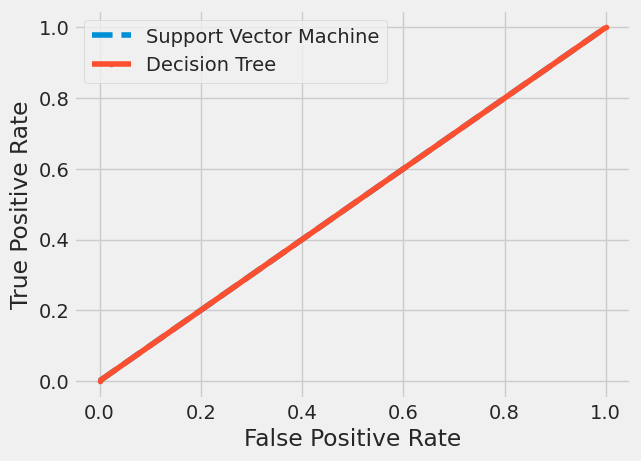

In [37]:
from tkinter.constants import Y
import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc = {}

# predict probabilities
svm_probs = classifier_svm.predict_proba(X_val_vectorized)
dt_probs = classifier_dt.predict_proba(X_val_vectorized)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
dt_probs = dt_probs[:, 1]
# calculate scores
svm_auc = roc_auc_score(y_val, svm_probs)
dt_auc = roc_auc_score(y_val, dt_probs)
# Store scores for comparison
roc_auc['SVM'] = np.round(svm_auc, 3)
roc_auc['Decision Tree'] = np.round(dt_auc, 3)
# summarize scores
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
sc_fpr, sc_tpr, _ = roc_curve(y_val, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_val, dt_probs)
# plot the roc curve for the model
plt.plot(sc_fpr, sc_tpr, linestyle='--', label='Support Vector Machine')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Create comparison table for SVM and Decision Tree:

In [38]:
# Create comparison table
comparison_table = pd.DataFrame({
    'Model': ['Support Vector Machine', 'Decision Tree'],
    'Accuracy': [accuracies['SVM'], accuracies['Decision Tree']],
    'ROC AUC': [roc_auc['SVM'], roc_auc['Decision Tree']]
})
print(comparison_table)

                    Model  Accuracy  ROC AUC
0  Support Vector Machine      50.0      0.5
1           Decision Tree      50.0      0.5


Error Analysis:

In [39]:
# Get the original index of the validation set
y_val_index = y_val.index

# Iterate through the indices of Y_val and compare with predictions
# Use the original index to access Y_val and the sequential position i to access y_pred_svm
indices = [y_val_index[i] for i in range(len(y_val)) if y_val.iloc[i] != y_pred_svm[i]]

# Use the collected original indices to select rows from the original training DataFrame
wrong_predictions_svm = df_train.loc[indices,:]
print(len(wrong_predictions_svm))

373


In [40]:
wrong_predictions_svm.groupby('label').count()

,essay,clean_essay
label,,
0,373,373


In [41]:
# Get the original index of the validation set
y_val_index = y_val.index

# Iterate through the indices of Y_val and compare with predictions
# Use the original index to access Y_val and the sequential position i to access y_pred_svm
indices = [y_val_index[i] for i in range(len(y_val)) if y_val.iloc[i] != y_pred_dt[i]]

# Use the collected original indices to select rows from the original training DataFrame
wrong_predictions_dt = df_train.loc[indices,:]
print(len(wrong_predictions_dt))

373


In [43]:
wrong_predictions_dt.groupby('label').count()

,essay,clean_essay
label,,
1,373,373


Analyze Feature Importance for Decision Tree:

In [45]:
# Analyze Feature Importance (for Decision Tree)
print("Analyzing feature importance for Decision Tree...")

# Get the fitted vectorizer and classifier
vectorizer = dt_grid_search.best_estimator_.named_steps['vectorizer']
classifier = dt_grid_search.best_estimator_.named_steps['classifier']

# Get feature coefficients
feature_coefficients = classifier.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Find most important AI features (indicate AI-written)
top_AI_indices = feature_coefficients.argsort()[-10:][::-1]
print("Top 10 features for AI-written:")
for i, idx in enumerate(top_AI_indices, 1):
    print(f"  {i:2d}. {feature_names[idx]:<15} (coefficient: {feature_coefficients[idx]:+.4f})")

# Find most important human features (indicate human-written)
top_human_indices = feature_coefficients.argsort()[:10]
print("\nTop 10 features for human-written:")
for i, idx in enumerate(top_human_indices, 1):
    print(f"  {i:2d}. {feature_names[idx]:<15} (coefficient: {feature_coefficients[idx]:+.4f})")

Analyzing feature importance for Decision Tree...
Top 10 features for AI-written:
   1. abortion        (coefficient: +0.0000)
   2. youngster       (coefficient: +0.0000)
   3. yield           (coefficient: +0.0000)
   4. year            (coefficient: +0.0000)
   5. wrongdoing      (coefficient: +0.0000)
   6. wrong           (coefficient: +0.0000)
   7. writer          (coefficient: +0.0000)
   8. wright          (coefficient: +0.0000)
   9. activity        (coefficient: +0.0000)
  10. actor           (coefficient: +0.0000)

Top 10 features for human-written:
   1. wound           (coefficient: +0.0000)
   2. worth           (coefficient: +0.0000)
   3. worry           (coefficient: +0.0000)
   4. world           (coefficient: +0.0000)
   5. workspace       (coefficient: +0.0000)
   6. workplace       (coefficient: +0.0000)
   7. workload        (coefficient: +0.0000)
   8. woman           (coefficient: +0.0000)
   9. wife            (coefficient: +0.0000)
  10. watt            (coef

# **7. Final Predictions and Results**

In [46]:
# Final Testing
print("Final Model Testing")
print("-" * 25)

# vectorize data
X_test_vectorized = vectorizer.transform(df_test['clean_essay'])

# Using SVM due to higher CV scores
# Predict on the test data
y_pred_final = classifier_svm.predict(X_test_vectorized)

print(len(y_pred_final))

Final Model Testing
-------------------------
869


Write results to a csv file:

In [47]:
# create index array
indexes = np.arange(0, 870)

# convert array into dataframe
prediction_df = pd.DataFrame(list(zip(indexes, y_pred_final)), columns=["essay_id", "predicted_label"])

print(prediction_df)

     essay_id  predicted_label
0           0                1
1           1                1
2           2                1
3           3                1
4           4                1
..        ...              ...
864       864                1
865       865                1
866       866                1
867       867                1
868       868                1

[869 rows x 2 columns]


In [48]:
# convert dataframe to csv file
prediction_df.to_csv('Emily_Novak_test_R11798447.csv', index=False)